<a href="https://colab.research.google.com/github/chrisMac93/Fashion-MNist-TensorFlow-tutorial/blob/master/Fashion(tftutorial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Tensorflow and keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)

2.2.0


In [0]:
#Import Fashion MNist Dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
###Explore Data
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [19]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
len(test_labels)

10000

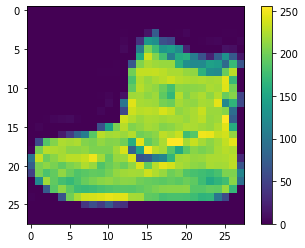

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#Scale values in range of 0 to 1
train_images = train_images / 255
test_images = test_images / 255

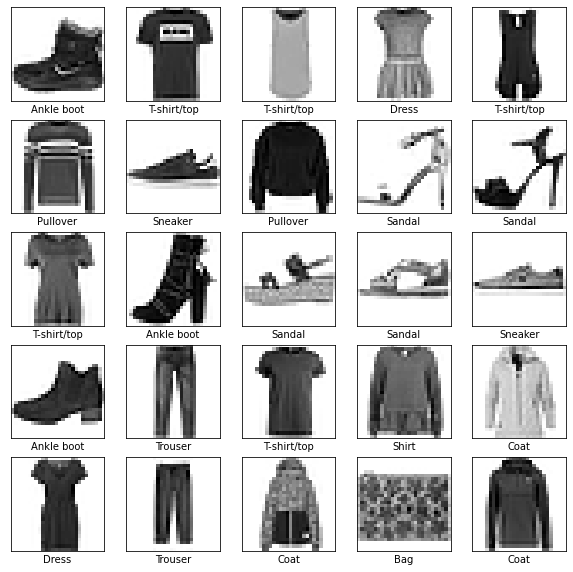

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
#Build the Model, set up/chain layers
model = keras.Sequential([
  #Transform format of images from 2d to 1d (28*28=784 pixels)
  keras.layers.Flatten(input_shape=(28,28)),
  #First Dense layer has 128 nodes(neurons)
  keras.layers.Dense(128, activation='relu'),
  # Second Dense layer returns a logits array(length of 10 classes)
  #Score of each node indicates that a current image belongs to one of the 10 classes
  keras.layers.Dense(10)
])

In [0]:
#Compile Model
model.compile(optimizer='adam', #updates model based on data and loss
              # measures acuracy of model during training. gradient decent 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #Used to monitor the training and testing steps
              metrics=['accuracy'])

In [34]:
#Train the Model
#Feed the training data to the model 
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4958 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3718 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3108 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2813 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2505 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3584 - accuracy: 0.8758

Test accuracy:  0.8758000135421753


In [0]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [38]:
#model has predicted label for first image in testing set
#array of 10 numbers, represents models confidence that an image corresponds to each of the 10 classes
predictions[0]

array([7.0587913e-09, 6.8202870e-09, 1.8160850e-11, 1.5369452e-09,
       1.1877617e-08, 8.6149281e-05, 4.9719966e-09, 7.0565776e-03,
       5.8513377e-10, 9.9285722e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [40]:
#model is most confident that the first image is a an ankle boot(element 9)
#is this correct, lets see
test_labels[0]

9

In [0]:
# in this instance, it is correct.
#lets graph it
#set up plot functions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt. grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color ='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

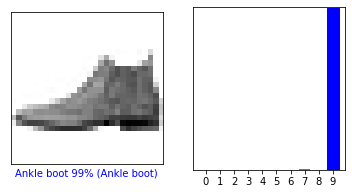

In [43]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

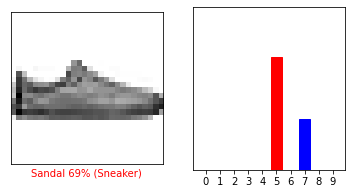

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

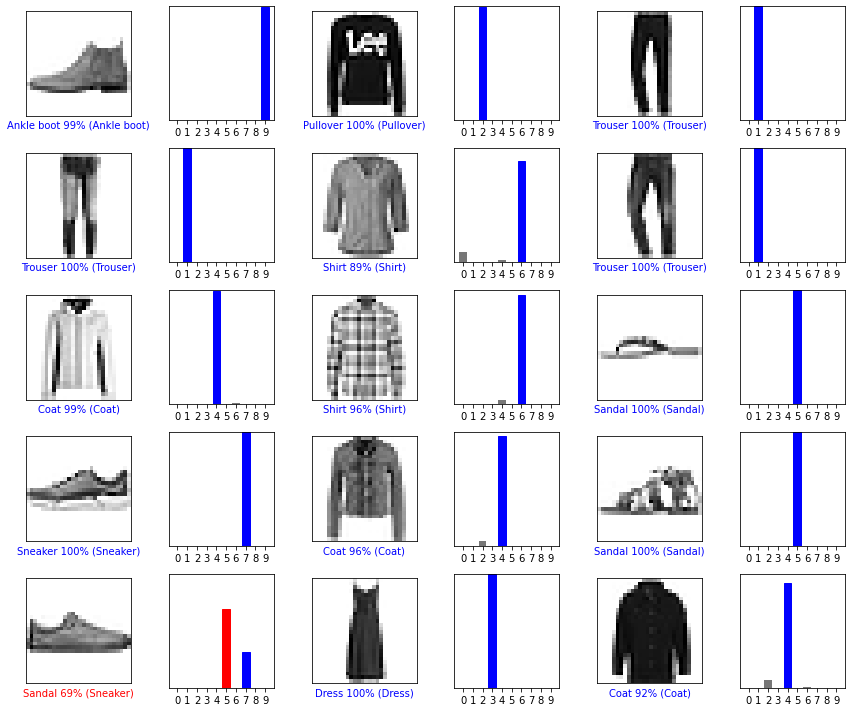

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [46]:
#Used trained model to predict single image
img = test_images[1]

print(img.shape)

(28, 28)


In [47]:
#Add image to batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [48]:
# Predict the correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4591501e-06 1.4375037e-12 9.9775094e-01 2.7979393e-13 2.2252609e-03
  3.2087109e-16 2.0328363e-05 4.1597869e-15 5.9746319e-11 6.4547526e-13]]


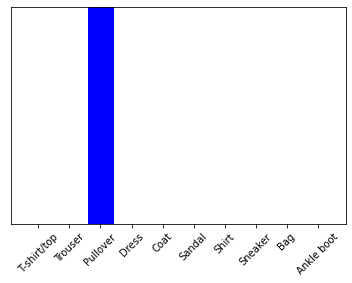

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [50]:
np.argmax(predictions_single[0])

2